In [102]:
df<-read.csv("./movies/withoutOutlier.csv")

In [138]:
df$감독 <- as.character(df$감독)
df[100,"감독"] <- "백종열"


In [139]:
df2 <- subset(df, 누적관객수 >= 3000000)

In [140]:
nrow(df2)

[1] 109

In [141]:
nrow(df)

[1] 193

In [146]:
movie.kmeans <- kmeans(df2[,3], centers = 3, iter.max = 100)
movie.kmeans
df2$cluster <- as.factor(movie.kmeans$cluster)

K-means clustering with 3 clusters of sizes 37, 43, 29

Cluster means:
     [,1]
1 5273662
2 3575761
3 7735577

Clustering vector:
  [1] 3 2 2 1 2 1 1 2 2 2 3 1 3 2 1 3 3 3 3 2 1 3 2 2 3 2 2 1 2 1 3 3 2 1 1 1 1
 [38] 1 2 3 3 2 3 2 1 3 1 2 1 3 1 3 1 2 1 3 3 1 2 2 2 1 2 2 3 2 2 1 2 1 2 3 2 1
 [75] 1 2 1 1 2 2 1 3 1 2 3 1 1 2 3 1 3 1 2 2 1 1 2 2 2 3 1 1 2 2 2 3 2 3 3

Within cluster sum of squares by cluster:
[1] 12126481346736  6639411436057 28369835542555
 (between_SS / total_SS =  86.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

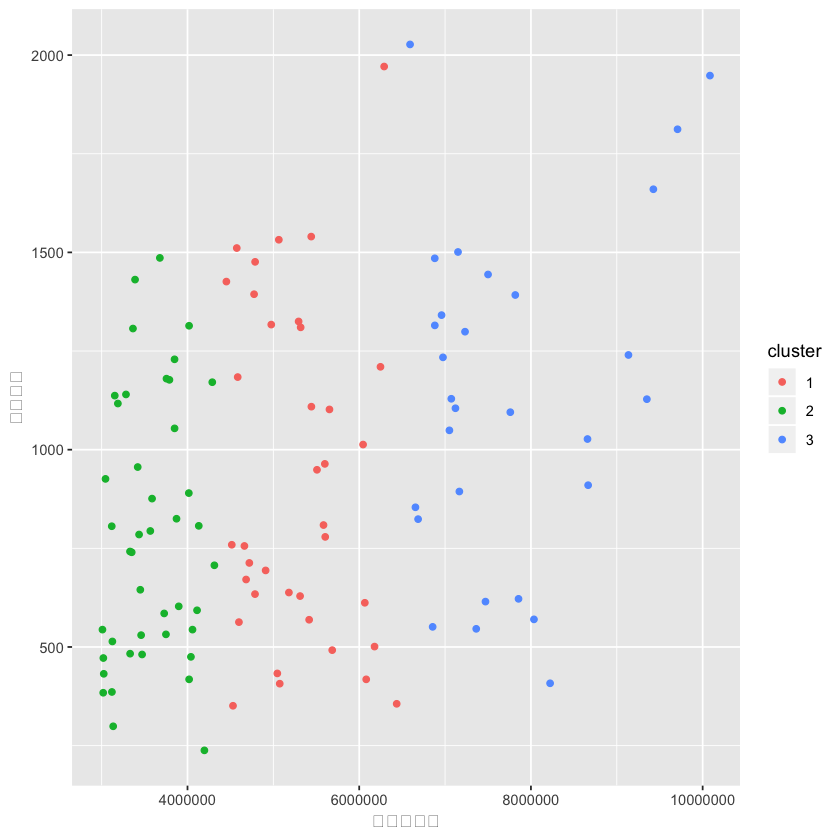

In [149]:
qplot(누적관객수, 스크린수, colour = cluster, data = df2)

In [148]:
write.csv(df2,"./movies/new_movie_ver3.csv",row.names=F)

In [105]:
library(dplyr)
library(caret)

In [111]:
head(df)

영화명        누적매출액  누적관객수 스크린수 상영횟수 개봉일    
1 1987          58169776145 7232387    1299     138226   2017-12-27
2 1번가의 기적  15494122100 2535450     340      54566   2007-02-14
3 26년          21242367145 2963652     611      50679   2012-11-29
4 7광구         19391653500 2242510     812      47346   2011-08-04
5 7급 공무원    26380710000 4039891     475      90779   2009-04-22
6 82년생 김지영 30298542310 3678156    1486     145441   2019-10-23
  배급사                           등급           장르                   
1 (주)씨제이이엔엠                 15세이상관람가 드라마                 
2 CJ ENM                           15세이상관람가 드라마,코미디          
3 (주)인벤트스톤,영화사청어람(주)  15세이상관람가 액션,드라마            
4 (주)씨제이이엔엠                 15세이상관람가 SF,액션,스릴러         
5 롯데쇼핑㈜롯데엔터테인먼트       12세이상관람가 코미디,액션,드라마,범죄
6 롯데컬처웍스(주)롯데엔터테인먼트 12세이상관람가 드라마                 
  감독  
1 장준환
2 윤제균
3 조근현
4 김지훈
5 신태라
6 김도영
  배우                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
1 안대겸,김윤석,하정우,유해진,김태리,박희순,이희준,설경구,여진구,윤재국,지웅배,정재윤,이가영,이동욱,이동희,이상준,이태형,최광일,강동원,문소리,문성근,김원진,남민우,이주영,임병우,김시은,김기태,정재윤,황성준,서현우,조민준,박지환,박명신,김푸름,이화룡,이창훈,이신성,김수진,박경혜,김국희,황정민,한준우,정승길,현봉식,강신철,한성천,나철,김승훈,정인기,양조아,최교식,이장유,김경덕,최현종,정순원,이하영,유정호,곽진석,박혁민,염석무,이범규                                                                                                      
2 하지원,임창정,강예원,정두홍,박용주,신윤주,남동협,채백호,최광섭,김서경,곽진석,오수현,이규원,주현,이용녀,김희원,박영수,정민성,곽진석                                                                                                                                                                                                                                                                                                                                                                                                            
3 진구,한혜진,임슬옹,배수빈,이경영,장광,천우희,이현걸,전종석,정광재,지성용,김병오,이상훈,이경영,정현진,이미도,조덕제,김의성,김도윤,김태준,김기천,이상훈,정희태,한사명,박서연                                                                                                                                                                                                                                                                                                                                                                    
4 하지원,박철민,김성태,차예련,이한위,오지호,송새벽,안성기,박원희,김형석,박정학,배명호,장동원,정상용,박영수,오민석,정인기                                                                                                                                                                                                                                                                                                                                                                                                                        
5 김하늘,강지환,유승목,강규영,김민국,강신일,장남열,심은혜,나귀화,서정주,천성일,민홍남,이상욱,박병렬,정경민,이수지,임성현,김재훈,김철남,이가현,서민경,이정선,김은주,손호승,김형범,장영남,리우진,이창훈,김승훈,오연아,박지영                                                                                                                                                                                                                                                                                                                      
6 이시영,정유미,공유,김미경,공민정,박성연,이봉련,김성철,이얼,전국향,박세현,김미경,손성찬,강애심,김정영,예수정,염혜란,김해나,어성욱,권귀빈,류아영,김하연,강별,기소유,이나윤,유준후,김용준,이지혜,우지현,이성욱,김지수,윤서진,김미지,이재인,이주원,원춘규,김해나,정준,김금순,윤사봉,정형석,손규원,신태양,최희진,박수진,김국희,정선아,김선미,이음,이승용,조백한,오해주,오일영,우도임,구재연,정태성,허태경,권지숙,백효성,김철진,김규도,김영표,김성태,김지우,송윤,이해운,최수빈,김남진,김선혜,주인영,조예린,고재원,천문정,정선아,김정원,예수정,염혜란
  제작사                                            
1 (주)우정필름                                      
2 (주)두사부필름       

In [112]:
str(df)

'data.frame':	193 obs. of  12 variables:
 $ 영화명    : Factor w/ 193 levels "1987","1번가의 기적",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ 누적매출액: num  58169776145 15494122100 21242367145 19391653500 26380710000 ...
 $ 누적관객수: int  7232387 2535450 2963652 2242510 4039891 3678156 2598859 2368267 4529876 2924563 ...
 $ 스크린수  : int  1299 340 611 812 475 1486 444 537 351 1073 ...
 $ 상영횟수  : int  138226 54566 50679 47346 90779 145441 51434 48432 61009 111527 ...
 $ 개봉일    : Factor w/ 182 levels "2004-02-05","2005-01-27",..: 153 22 85 66 40 178 18 68 7 177 ...
 $ 배급사    : Factor w/ 30 levels "(주)넥스트엔터테인먼트월드(NEW)",..: 7 29 14 7 16 19 3 1 3 1 ...
 $ 등급      : Factor w/ 7 levels "12세관람가","12세이상관람가",..: 4 4 4 4 2 2 3 4 3 4 ...
 $ 장르      : Factor w/ 75 levels "공포(호러),드라마",..: 6 15 54 75 71 6 65 65 65 22 ...
 $ 감독      : chr  "장준환" "윤제균" "조근현" "김지훈" ...
 $ 배우      : Factor w/ 193 levels "강동원,이나영,윤여정,김지영,최정우,조민기,강신일,권오훈,강선아,이훈진,김자영,정연주,지용석,김진희,김종길,이유진"| __truncated__,..: 98 179 163 178 42 124 95 22 93 13 ...
 $ 제작사

In [113]:
cor(df$누적매출액,df$누적관객수)
cor(df$누적매출액,df$스크린수)
cor(df$누적매출액,df$상영횟수)


[1] 0.9799851

[1] 0.555583

[1] 0.8739439

In [114]:
cor(df$누적관객수,df$스크린수)
cor(df$누적관객수,df$상영횟수)
cor(df$스크린수,df$상영횟수)

[1] 0.422587

[1] 0.8155328

[1] 0.6491068

In [115]:
df2 <- arrange(df,desc(누적관객수))

In [116]:
df2

영화명                      누적매출액  누적관객수 스크린수 상영횟수
1   기생충                      85883963645 10085275   1948     192855  
2   검사외전                    77320403264  9707581   1812     153532  
3   엑시트                      79232012162  9426011   1660     202223  
4   설국열차                    67012235200  9350323   1128     124858  
5   관상                        66009791500  9135802   1240     125105  
6   해적: 바다로 간 산적        66372140706  8666208    910     133354  
7   수상한 그녀                 62710880849  8658800   1027     136985  
8   과속스캔들                  53800771400  8223266    408     145555  
9   국가대표                    57570773000  8035181    570     131671  
10  디워                        49340084700  7855474    622      96439  
11  공조                        63783303326  7817654   1392     142991  
12  히말라야                    60175363015  7759761   1095     142715  
13  밀정                        61270079831  7500457   1444     138162  
14  최종병기 활                 55827861500  7470633    615     130054  
15  써니                        54036428100  7362789    546     149143  
16  1987                        58169776145  7232387   1299     138226  
17  베를린                      52356534637  7166453    894     111749  
18  마스터                      58068236865  7150586   1501     126927  
19  터널                        57530028417  7120780   1105     113214  
20  내부자들                    56599221057  7072507   1129     152636  
21  인천상륙작전                55105606303  7050475   1049      97032  
22  럭키                        56445023256  6975571   1234     155990  
23  은밀하게 위대하게           48700887413  6959083   1341     117461  
24  범죄도시                    56322153349  6880546   1315     149389  
25  곡성                        55864308382  6879989   1485     130332  
26  화려한 휴가                 44098519600  6855314    551      96528  
27  좋은 놈, 나쁜 놈, 이상한 놈 43754257000  6685845    824      93574  
28  늑대소년                    46593140500  6654842    854     109134  
29  군함도                      50510565168  6592151   2027     108775  
30  웰컴 투 동막골              40328508500  6436508    356      72108  
... ...                         ...         ...        ...      ...     
164 하녀                        17038639000 2267556     555     59621   
165 황해                        17497165500 2260512     618     42102   
166 7광구                       19391653500 2242510     812     47346   
167 타짜: 원 아이드 잭          19687029214 2229239    1429     66479   
168 박쥐                        14835618500 2205621     499     45400   
169 마당을 나온 암탉            14671637000 2202093     363     39295   
170 악의 연대기                 17361815332 2192525     776     64351   
171 강남 1970                   17718699499 2192276     841     53304   
172 신의 한 수: 귀수편          18463776050 2157437    1246     82178   
173 마이 웨이                   15995187000 2142670     645     54348   
174 나의 사랑 나의 신부         16636404305 2141155     629     69684   
175 바르게 살자                 13944930000 2135606     372     55993   
176 내 사랑 내 곁에             15584755500 2135509     478     65168   
177 초능력자                    15374798000 2130645     612     58009   
178 굿바이 싱글                 16913282195 2108561     841     56390   
179 몽타주                      15002458500 2095592     544     53195   
180 명당                        17900775524 2087474    1117     58450   
181 내부자들: 디 오리지널       16979714975 2084868     838     47237   
182 극락도 살인사건             13328932000 2079989     368     54098   
183 달콤, 살벌한 연인           13426707100 2077590     246     38034   
184 박수칠 때 떠나라            13181626500 2073641     237     32149   
185 쩨쩨한 로맨스               15800299000 2067534     450     47891   
186 눈에는 눈 이에는 이         13410811500 2058616     445     46474   
187 뷰티 인사이드               16184831031 2057896     648     53350   
188 봉이 김선달                 16227052642 2051277     942     51418   
189 세븐 데이즈                 13720377000 2048339     305     47249   
190 광식이 동생 광태            12811265009 2024

In [132]:
movie.kmeans <- kmeans(df2[,3], centers = 3, iter.max = 100)

In [133]:
movie.kmeans

K-means clustering with 3 clusters of sizes 109, 51, 33

Cluster means:
     [,1]
1 2639045
2 4738334
3 7560147

Clustering vector:
  [1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[186] 1 1 1 1 1 1 1 1

Within cluster sum of squares by cluster:
[1] 21922205096178 23934569983983 35768624115505
 (between_SS / total_SS =  88.8 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [134]:
movie.kmeans$cluster

[1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[186] 1 1 1 1 1 1 1 1

In [135]:
table(movie.kmeans$cluster)


  1   2   3 
109  51  33 

In [136]:
par

function (..., no.readonly = FALSE) 
{
    .Pars.readonly <- c("cin", "cra", "csi", "cxy", "din", "page")
    single <- FALSE
    args <- list(...)
    if (!length(args)) 
        args <- as.list(if (no.readonly) 
            .Pars[-match(.Pars.readonly, .Pars)]
        else .Pars)
    else {
        if (all(unlist(lapply(args, is.character)))) 
            args <- as.list(unlist(args))
        if (length(args) == 1) {
            if (is.list(args[[1L]]) | is.null(args[[1L]])) 
                args <- args[[1L]]
            else if (is.null(names(args))) 
                single <- TRUE
        }
    }
    value <- .External2(C_par, args)
    if (single) 
        value <- value[[1L]]
    if (!is.null(names(args))) 
        invisible(value)
    else value
}
<bytecode: 0x7fb86513b778>
<environment: namespace:graphics>

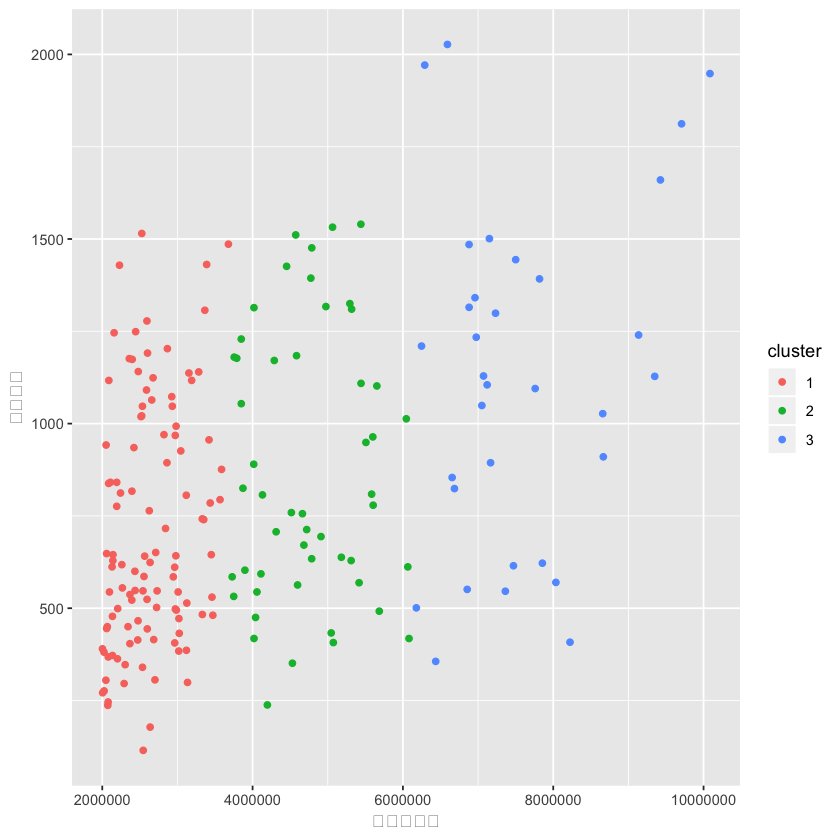

In [137]:

options(scipen = 100)
par(family = "AppleGothic")

options(warn = -1)
df2$cluster <- as.factor(movie.kmeans$cluster)
qplot(누적관객수, 스크린수, colour = cluster, data = df2)

In [123]:
str(df2)

'data.frame':	193 obs. of  13 variables:
 $ 영화명    : Factor w/ 193 levels "1987","1번가의 기적",..: 40 18 132 108 27 185 111 26 29 65 ...
 $ 누적매출액: num  85883963645 77320403264 79232012162 67012235200 66009791500 ...
 $ 누적관객수: int  10085275 9707581 9426011 9350323 9135802 8666208 8658800 8223266 8035181 7855474 ...
 $ 스크린수  : int  1948 1812 1660 1128 1240 910 1027 408 570 622 ...
 $ 상영횟수  : int  192855 153532 202223 124858 125105 133354 136985 145555 131671 96439 ...
 $ 개봉일    : Factor w/ 182 levels "2004-02-05","2005-01-27",..: 173 125 174 95 98 108 103 38 44 25 ...
 $ 배급사    : Factor w/ 30 levels "(주)넥스트엔터테인먼트월드(NEW)",..: 7 3 7 7 3 16 7 16 3 3 ...
 $ 등급      : Factor w/ 7 levels "12세관람가","12세이상관람가",..: 4 4 2 4 4 2 4 2 2 2 ...
 $ 장르      : Factor w/ 75 levels "공포(호러),드라마",..: 6 34 70 74 36 61 6 65 12 60 ...
 $ 감독      : chr  "봉준호" "이일형" "이상근" "봉준호" ...
 $ 배우      : Factor w/ 193 levels "강동원,이나영,윤여정,김지영,최정우,조민기,강신일,권오훈,강선아,이훈진,김자영,정연주,지용석,김진희,김종길,이유진"| __truncated__,..: 86 187 158 171 87 10

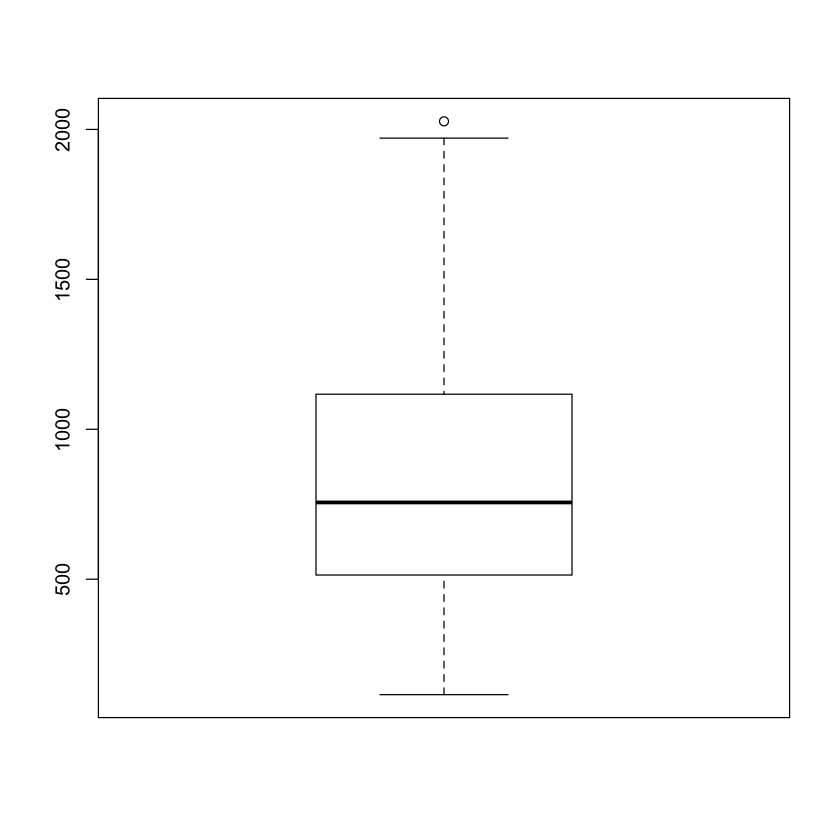

In [124]:
boxplot(df2$스크린수)

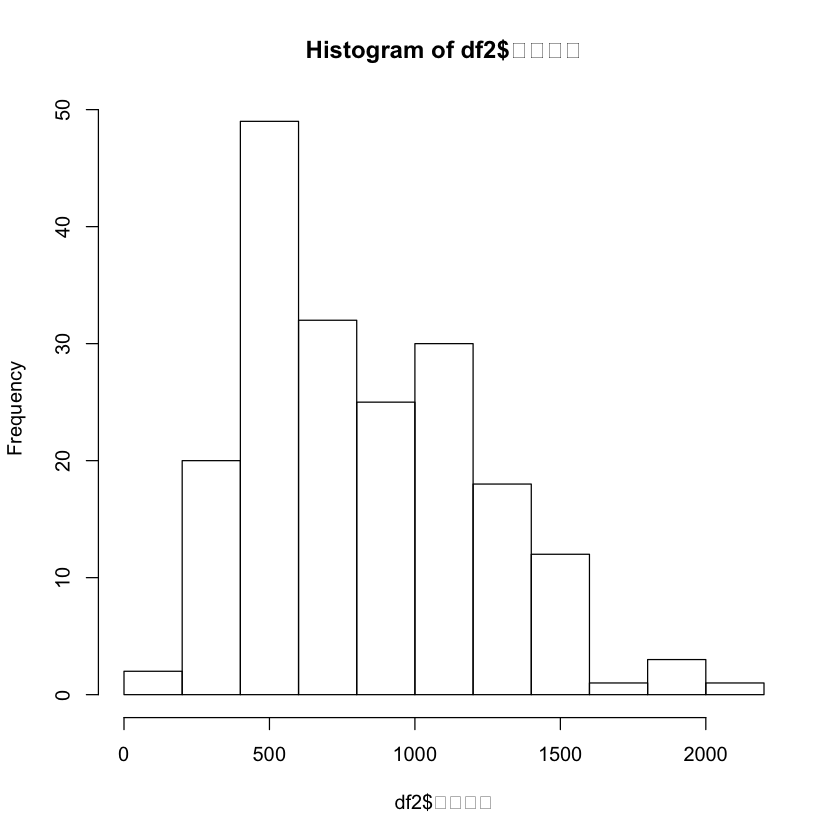

In [125]:
hist(df2$스크린수)


In [126]:
shapiro.test(df2$스크린수)


	Shapiro-Wilk normality test

data:  df2$스크린수
W = 0.95346, p-value = 0.000005955


In [127]:
df2

영화명                      누적매출액  누적관객수 스크린수 상영횟수
1   기생충                      85883963645 10085275   1948     192855  
2   검사외전                    77320403264  9707581   1812     153532  
3   엑시트                      79232012162  9426011   1660     202223  
4   설국열차                    67012235200  9350323   1128     124858  
5   관상                        66009791500  9135802   1240     125105  
6   해적: 바다로 간 산적        66372140706  8666208    910     133354  
7   수상한 그녀                 62710880849  8658800   1027     136985  
8   과속스캔들                  53800771400  8223266    408     145555  
9   국가대표                    57570773000  8035181    570     131671  
10  디워                        49340084700  7855474    622      96439  
11  공조                        63783303326  7817654   1392     142991  
12  히말라야                    60175363015  7759761   1095     142715  
13  밀정                        61270079831  7500457   1444     138162  
14  최종병기 활                 55827861500  7470633    615     130054  
15  써니                        54036428100  7362789    546     149143  
16  1987                        58169776145  7232387   1299     138226  
17  베를린                      52356534637  7166453    894     111749  
18  마스터                      58068236865  7150586   1501     126927  
19  터널                        57530028417  7120780   1105     113214  
20  내부자들                    56599221057  7072507   1129     152636  
21  인천상륙작전                55105606303  7050475   1049      97032  
22  럭키                        56445023256  6975571   1234     155990  
23  은밀하게 위대하게           48700887413  6959083   1341     117461  
24  범죄도시                    56322153349  6880546   1315     149389  
25  곡성                        55864308382  6879989   1485     130332  
26  화려한 휴가                 44098519600  6855314    551      96528  
27  좋은 놈, 나쁜 놈, 이상한 놈 43754257000  6685845    824      93574  
28  늑대소년                    46593140500  6654842    854     109134  
29  군함도                      50510565168  6592151   2027     108775  
30  웰컴 투 동막골              40328508500  6436508    356      72108  
... ...                         ...         ...        ...      ...     
164 하녀                        17038639000 2267556     555     59621   
165 황해                        17497165500 2260512     618     42102   
166 7광구                       19391653500 2242510     812     47346   
167 타짜: 원 아이드 잭          19687029214 2229239    1429     66479   
168 박쥐                        14835618500 2205621     499     45400   
169 마당을 나온 암탉            14671637000 2202093     363     39295   
170 악의 연대기                 17361815332 2192525     776     64351   
171 강남 1970                   17718699499 2192276     841     53304   
172 신의 한 수: 귀수편          18463776050 2157437    1246     82178   
173 마이 웨이                   15995187000 2142670     645     54348   
174 나의 사랑 나의 신부         16636404305 2141155     629     69684   
175 바르게 살자                 13944930000 2135606     372     55993   
176 내 사랑 내 곁에             15584755500 2135509     478     65168   
177 초능력자                    15374798000 2130645     612     58009   
178 굿바이 싱글                 16913282195 2108561     841     56390   
179 몽타주                      15002458500 2095592     544     53195   
180 명당                        17900775524 2087474    1117     58450   
181 내부자들: 디 오리지널       16979714975 2084868     838     47237   
182 극락도 살인사건             13328932000 2079989     368     54098   
183 달콤, 살벌한 연인           13426707100 2077590     246     38034   
184 박수칠 때 떠나라            13181626500 2073641     237     32149   
185 쩨쩨한 로맨스               15800299000 2067534     450     47891   
186 눈에는 눈 이에는 이         13410811500 2058616     445     46474   
187 뷰티 인사이드               16184831031 2057896     648     53350   
188 봉이 김선달                 16227052642 2051277     942     51418   
189 세븐 데이즈                 13720377000 2048339     305     47249   
190 광식이 동생 광태            12811265009 2024

In [89]:
cor(iris[,1:4])

Sepal.Length Sepal.Width Petal.Length Petal.Width
Sepal.Length  1.0000000   -0.1175698   0.8717538    0.8179411 
Sepal.Width  -0.1175698    1.0000000  -0.4284401   -0.3661259 
Petal.Length  0.8717538   -0.4284401   1.0000000    0.9628654 
Petal.Width   0.8179411   -0.3661259   0.9628654    1.0000000

In [128]:
head(df2)

영화명               누적매출액  누적관객수 스크린수 상영횟수 개봉일    
1 기생충               85883963645 10085275   1948     192855   2019-05-30
2 검사외전             77320403264  9707581   1812     153532   2016-02-03
3 엑시트               79232012162  9426011   1660     202223   2019-07-31
4 설국열차             67012235200  9350323   1128     124858   2013-08-01
5 관상                 66009791500  9135802   1240     125105   2013-09-11
6 해적: 바다로 간 산적 66372140706  8666208    910     133354   2014-08-06
  배급사                     등급           장르        감독  
1 (주)씨제이이엔엠           15세이상관람가 드라마      봉준호
2 (주)쇼박스                 15세이상관람가 범죄,코미디 이일형
3 (주)씨제이이엔엠           12세이상관람가 코미디,액션 이상근
4 (주)씨제이이엔엠           15세이상관람가 SF,액션     봉준호
5 (주)쇼박스                 15세이상관람가 사극,드라마 한재림
6 롯데쇼핑㈜롯데엔터테인먼트 12세이상관람가 어드벤처    이석훈
  배우                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
1 송강호,이선균,조여정,최우식,박소담,이정은,장혜진,박명훈,현승민,정현준,윤혜리,박근록,이시훈,김규백,설민,박가빈,정이서,조재명,정익한,안진상,이루아,김하언,하윤희,이도운,오별하,유인,유채련,정일화,지혜영,지연,최정연,서복현,심수미,장지우,한미자,주수지,강현규,고관재,박서준,곽신애,류영훈,문상근,김건,박재완,서한결,서희영,손지영,박혜숙,백동현,신승민,백승환,안성봉,염재민,오상준,오상준,김성수,김세인,윤영우,정재훈,김이슬,이종현,이주형,제승현,김혜련,김정우,이지혜,황인경,이덕형,이시은,김영조,이도용,김보령,김용각,정세현,이옥희,이상경,정아름,이은희,이인경,박미애,김진형,이시후,박재욱,양선영,장예원,최정현,김성준,최지원,김향배                                                                                                                                                                                                                                                                                 
2 황정민,강동원,이성민,박성웅,김응수,신소율,주진모,김원해,김홍파,김병옥,박종환,전배수,박지환,손종학,신혜선,김시은,김종수,한재영,박지환,박종우,박지홍,송승현,윤석민,이규호,이석준,이선주,이승우,이승준,이승훈,이승훈,최현준,김영,이정은,장지건,한창현,정기섭,민무제,손성찬,윤경호,최교식,류성현,백익남,백인권,전광진,임용순,박윤호,최정현,남진복,염석무,이형훈,이승민                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
3 조정석,임윤아,고두심,박인환,김지영,강기영,오희준,배유람,유수빈,조성희,주보비,김강현,정민성,박성일,신세휘,김경룡,김강훈,강덕중,강충훈,박상혁,곽민규,민대웅,권혁주,박윤희,박윤희,박정환,박주홍,설도희,배해선,백현익,신철진,양지혜,김병순,오누리,김보성,김상보,윤대열,오유진,김서율,김선호,김수연,김현수,김현수,이정인,정재은,임희수,최서현,정지우,최성윤,김형기,이선우,이성수,이성훈,조성동,김호정,조예린,김종구,황슬기,조윤호,전혜원,이찬유,조은성,최재영,최재영,이수정,김주아,강기영,김준수,이경오,주보비,주보비,최진영,고두심,곽새빛,곽호중,권상혁,최현아,권은빈,최혜인,기상원,채서원,김한솔,이동휘,이동희,이랑서,김태한,임종현,이창진,김이석,한우리,이화정,이봉련,김환영,김태환,주예서,김태율,정우영,정새다솜,정윤지,채승혜,슈기(최슬기),천대만,윤해빈,이채원,이재국,이학광,최영도,이현하,박재랑,이용탁,박채익,반혜라,탁트인,손현준,장서우,송원수,변건우,한서율,한승효,황지현,황효은,한윤식,허철,허형규,홍나현,강경수
4 크리스 에반스,송강호,에드 해리스,존 허트,틸다 스윈튼,제이미 벨,옥타비아 스펜서,이완 브렘너,고아성,알리슨 필,허찬                                                                                                                                                                                                                                                                                                                                                                                               

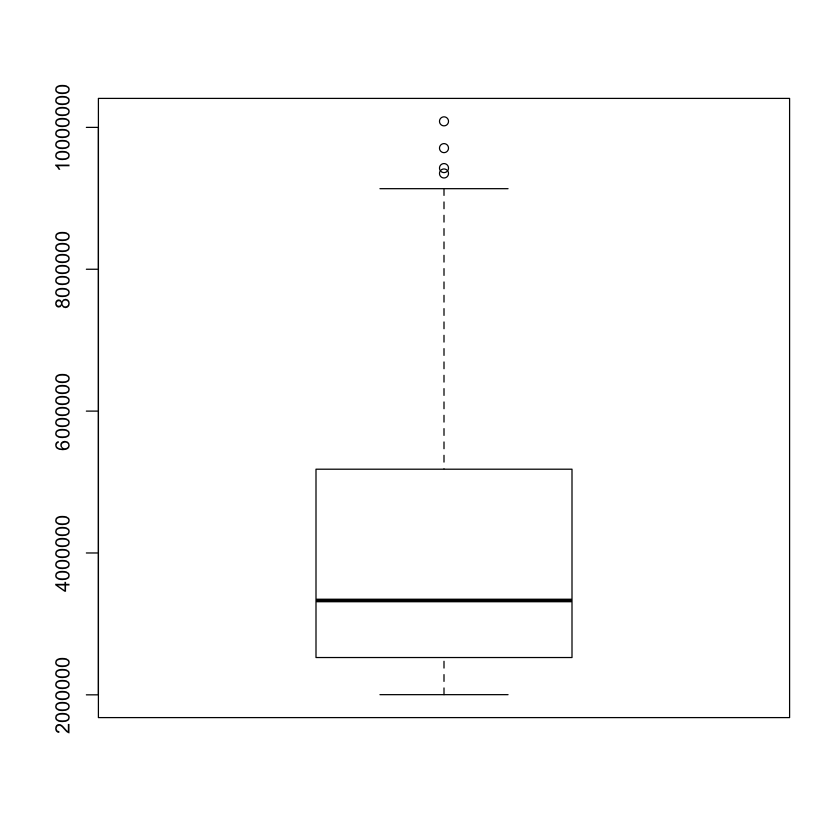

In [130]:

boxplot(df2$누적관객수)

영화명        누적매출액  누적관객수 스크린수 상영횟수 개봉일    
7 뷰티 인사이드 16184831031 2057896    648      53350    2015-08-20
  배급사                          등급           장르               감독
7 (주)넥스트엔터테인먼트월드(NEW) 12세이상관람가 판타지,멜로/로맨스 NA  
  배우                                                                                                                                                                                                                                                                                                                                                                                                                                       
7 한효주,김대명,도지한,배성우,박신혜,이범수,박서준,김상호,천우희,우에노 주리,이재준,김민재,이현우,조달환,이진욱,홍다미,서강준,김희원,이동욱,고아성,김주혁,유연석,이동휘,문숙,이경영,최용민,이미도,신동미,김시은,유재상,오상철,임예진,정두원,박지현,정은교,조유덕,차수보,차정환,손영진,신예진,유보라,윤여진,이미애,홍승철,이성준,이소연,이슬기,이승대,이진성,공민정,고규필,이봄,손슬기,박근록,이지민,우상기,박민수,권기하,장의수,손성찬,윤기창
  제작사    
7 (주)용필름